<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/Ej_2_M%C3%A9todo_de_Newton_Raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

# Método de Newton-Raphson
---

Resolver el siguiente sistema por el método de Newton-Raphson:

\begin{eqnarray}
f_1(x,y,z) &=& x^2 + y + 2z^2 - 10 &= 0 \\
f_2(x,y,z) &=& 5x - 6y + z &= 0 \\
f_3(x,y,z) &=& z - x^2 - y^2 &= 0
\end{eqnarray}

1. Graficar las funciones 
2. Elegir dos puntos iniciales
3. Calcular el error relativo con la norma espectral
4. Estimar la solución con una tolerancia de 0.0005
5. Presentar los resultados de forma breve y clara

## Graficando en geogebra obtenemos lo siguiente

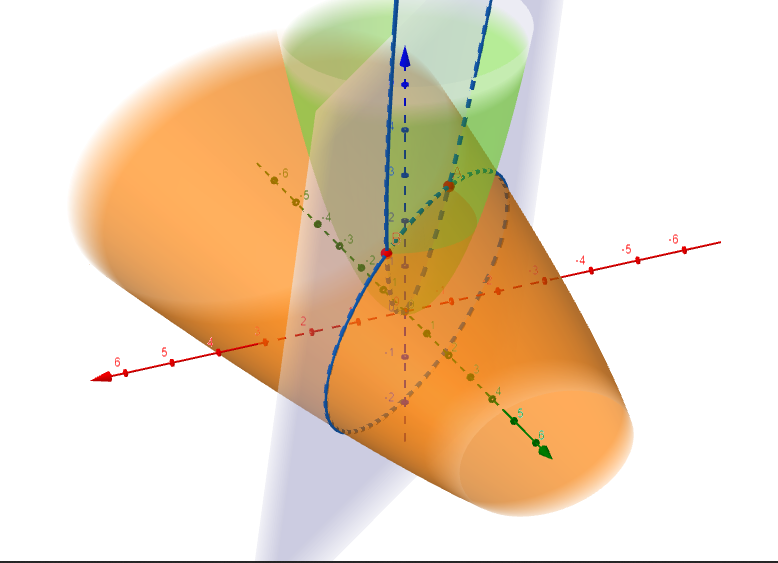

## Elegir los puntos iniciales
Así, podemos estimar el punto A cercano a (-1, -0.5, 2), y el punto B cercano a (1, 1, 2).

## Estimación de la solución utlizando el método de Newton-Raphson

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
# definimos nuestras funciones

f = [lambda x, y, z: x ** 2 + y + 2 * z ** 2 - 10,
    lambda x, y, z: 5 * x - 6 * y + z,
    lambda x, y, z: z - x ** 2 - y ** 2]
  
# declaramos las derivadas 
f_derivadas = np.array([
                        lambda x, y, z: 2 * x,
                        lambda x, y, z: y,
                        lambda x, y, z: 4 * z,
                        lambda x, y, z: 5,
                        lambda x, y, z: -6,
                        lambda x, y, z: 1,
                        lambda x, y, z: - 2 * x,
                        lambda x, y, z: - 2 * y,
                        lambda x, y, z: 1]).reshape(3,3)

In [ ]:
def jac_inv(values, derivadas):
  """Función que al pasar un arreglo y una matriz con las funciones derivadas,
  devuelve el inverso del Jacobiano evaluado en el punto"""
  res = np.zeros_like(derivadas, dtype = np.float64)
  for i in range(len(values)):
      for j in range(len(values)):
          res[i, j] = derivadas[i, j](*values)
  
  # print(f"Jacobaino: \n{res}")
  return np.linalg.inv(res)


In [ ]:
def f_vect(values, funciones):
  """Función que al pasar un arreglo y un arreglo de funciones, devuelve
  un arreglo del mismo tamaño de las funciones evaluadas en ese arreglo"""
  res = np.zeros_like(values)
  for i in range(len(values)):
      res[i] = funciones[i](*values)

  return res.reshape(len(values), 1)

In [ ]:
x0 = np.array([-1, -0.5, 2])
aprox = x0.reshape(3,1)
sol = [aprox.T]
error = np.zeros((3,1))
error_abs = [np.nan]
error_rel = [1]
xs = []
ys = []
zs = []

while error_rel[-1] > 0.0005:
  aprox = sol[-1].T - jac_inv(sol[-1].tolist()[0], f_derivadas) @ f_vect(sol[-1].tolist()[0], f)
  sol.append(aprox.T)

  error = sol[-1] - sol[-2]
  error_abs.append(np.max(np.abs(error)))
  error_rel.append(error_abs[-1] / (np.max(np.abs(sol[-1]))))

error_rel[0] = np.nan

for i in range(len(sol)):
  xs.append(sol[i][0][0])
  ys.append(sol[i][0][1])
  zs.append(sol[i][0][2])
tabla = pd.DataFrame({
    'xk': xs,
    'yk': ys,
    'zk': zs,
    'Error abs': error_abs,
    'Error relativo': error_rel,
})
tabla

,xk,yk,zk,Error abs,Error relativo
0,-1.000000,-0.500000,2.000000,NaN,NaN
1,-1.304455,-0.737624,2.096535,0.304455,0.145218
2,-1.278509,-0.709371,2.136319,0.039784,0.018623
3,-1.276310,-0.708448,2.130859,0.005460,0.002562
4,-1.276251,-0.708428,2.130686,0.000173,0.000081


In [ ]:
x0 = np.array([1, 1, 2])
aprox = x0.reshape(3,1)
sol = [aprox.T]
error = np.zeros((3,1))
error_abs = [np.nan]
error_rel = [1]
xs = []
ys = []
zs = []

while error_rel[-1] > 0.0005:
  aprox = sol[-1].T - jac_inv(sol[-1].tolist()[0], f_derivadas) @ f_vect(sol[-1].tolist()[0], f)
  sol.append(aprox.T)

  error = sol[-1] - sol[-2]
  error_abs.append(np.max(np.abs(error)))
  error_rel.append(error_abs[-1] / (np.max(np.abs(sol[-1]))))

error_rel[0] = np.nan

for i in range(len(sol)):
  xs.append(sol[i][0][0])
  ys.append(sol[i][0][1])
  zs.append(sol[i][0][2])
tabla = pd.DataFrame({
    'xk': xs,
    'yk': ys,
    'zk': zs,
    'Error abs': error_abs,
    'Error relativo': error_rel,
})
tabla

,xk,yk,zk,Error abs,Error relativo
0,1.000000,1.000000,2.000000,NaN,NaN
1,0.910995,1.094241,2.010471,0.094241,0.046875
2,0.906475,1.090560,2.010984,0.004520,0.002248
3,0.906459,1.090540,2.010944,0.000039,0.000020


## Resultados
El método converge para los valores iniciales que les dimos, siendo el primer punto en (-1.27625, -0.708428, 2.130686) encontrada en 4 iteraciones y el segundo punto encontrándose en (0.906459, 1.090540, 2.010944) encontrado en 3 iteraciones.

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)